In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)
import joblib
import pickle
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print("All libraries imported successfully!")

All libraries imported successfully!


In [3]:
# Loading the dataset
df = pd.read_csv('../data/Churn_Modelling.csv')
print("="*60)
print("DATASET LOADED SUCCESSFULLY")
print("="*60)
print(f"\nDataset Shape: {df.shape}")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print("\n" + "="*60)
print("FIRST 5 ROWS OF THE DATASET")
print("="*60)
display(df.head())
print("\n" + "="*60)
print("COLUMN NAMES")
print("="*60)
print(df.columns.tolist())

DATASET LOADED SUCCESSFULLY

Dataset Shape: (10000, 14)
Number of Rows: 10000
Number of Columns: 14

FIRST 5 ROWS OF THE DATASET


RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0


COLUMN NAMES
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


DATA TYPES AND MISSING VALUES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None

MISSING VALUES COUNT
No missing values found!

STATISTICAL

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000


TARGET VARIABLE DISTRIBUTION (Exited)
Exited
0    7963
1    2037
Name: count, dtype: int64

Churn Rate: 20.37%
Retention Rate: 79.63%

 Plot saved to: reports/target_distribution.png


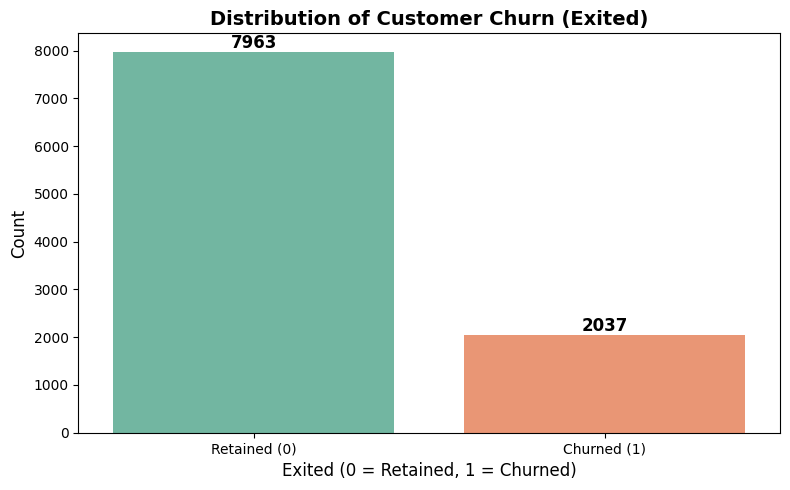

In [4]:
# Check data types and missing values
print("="*60)
print("DATA TYPES AND MISSING VALUES")
print("="*60)
print(df.info())

print("\n" + "="*60)
print("MISSING VALUES COUNT")
print("="*60)
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found!")

print("\n" + "="*60)
print("STATISTICAL SUMMARY")
print("="*60)
display(df.describe())

print("\n" + "="*60)
print("TARGET VARIABLE DISTRIBUTION (Exited)")
print("="*60)
churn_counts = df['Exited'].value_counts()
print(churn_counts)
print(f"\nChurn Rate: {(churn_counts[1] / len(df)) * 100:.2f}%")
print(f"Retention Rate: {(churn_counts[0] / len(df)) * 100:.2f}%")

# Visualize target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Exited', palette='Set2')
plt.title('Distribution of Customer Churn (Exited)', fontsize=14, fontweight='bold')
plt.xlabel('Exited (0 = Retained, 1 = Churned)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Retained (0)', 'Churned (1)'])
for i, count in enumerate(churn_counts):
    plt.text(i, count + 100, str(count), ha='center', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('../reports/target_distribution.png', dpi=300, bbox_inches='tight')
print("\n Plot saved to: reports/target_distribution.png")
plt.show()

NUMERICAL FEATURES
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

 Plot saved to: reports/numerical_features_distribution.png


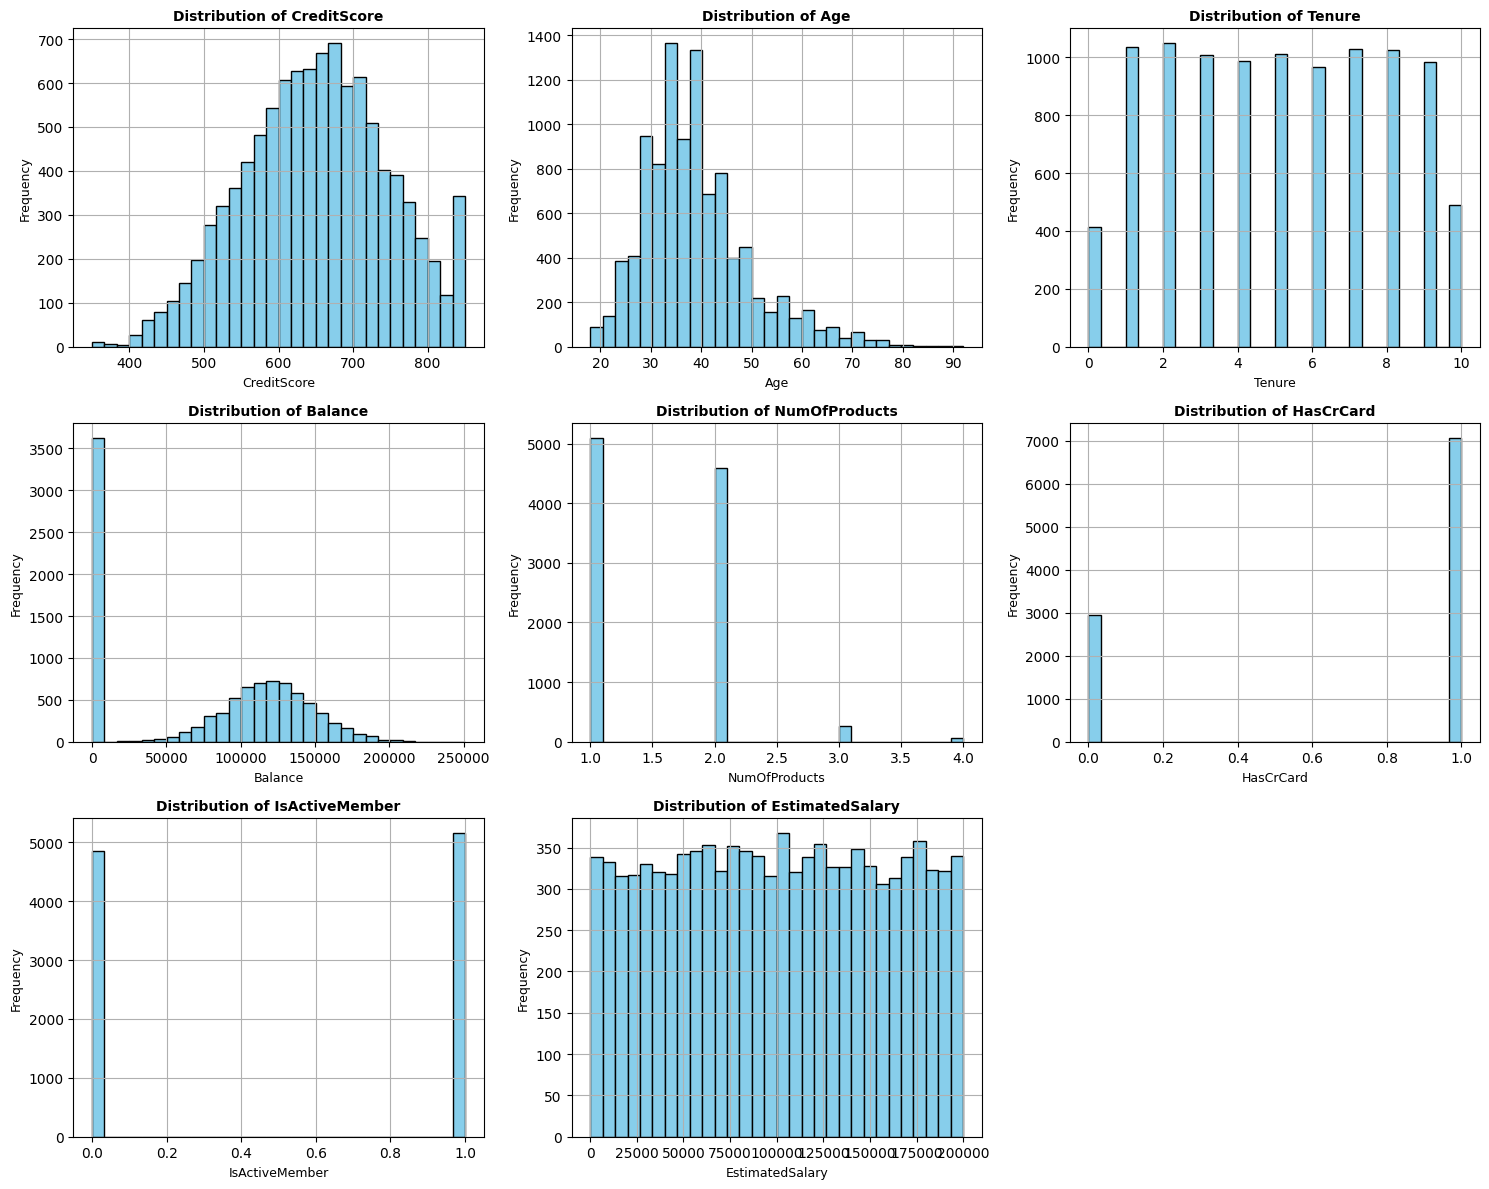


NUMERICAL FEATURES - MEAN VALUES BY CHURN STATUS


CreditScore        Age    Tenure       Balance  NumOfProducts  \
Exited                                                                  
0        651.853196  37.408389  5.033279  72745.296779       1.544267   
1        645.351497  44.837997  4.932744  91108.539337       1.475209   

        HasCrCard  IsActiveMember  EstimatedSalary  
Exited                                              
0        0.707146        0.554565     99738.391772  
1        0.699067        0.360825    101465.677531

In [5]:
# Identify numerical columns (excluding target and ID columns)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove ID columns and target variable
numerical_cols = [col for col in numerical_cols if col not in ['RowNumber', 'CustomerId', 'Exited']]

print("="*60)
print("NUMERICAL FEATURES")
print("="*60)
print(numerical_cols)

# Create distribution plots for numerical features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        df[col].hist(bins=30, ax=axes[idx], edgecolor='black', color='skyblue')
        axes[idx].set_title(f'Distribution of {col}', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel(col, fontsize=9)
        axes[idx].set_ylabel('Frequency', fontsize=9)

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')
plt.tight_layout()
plt.savefig('../reports/numerical_features_distribution.png', dpi=300, bbox_inches='tight')
print("\n Plot saved to: reports/numerical_features_distribution.png")
plt.show()

# Display statistics grouped by churn
print("\n" + "="*60)
print("NUMERICAL FEATURES - MEAN VALUES BY CHURN STATUS")
print("="*60)
display(df.groupby('Exited')[numerical_cols].mean())




CATEGORICAL FEATURES
['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Tenure']

 Plot saved to: reports/categorical_features_vs_churn.png


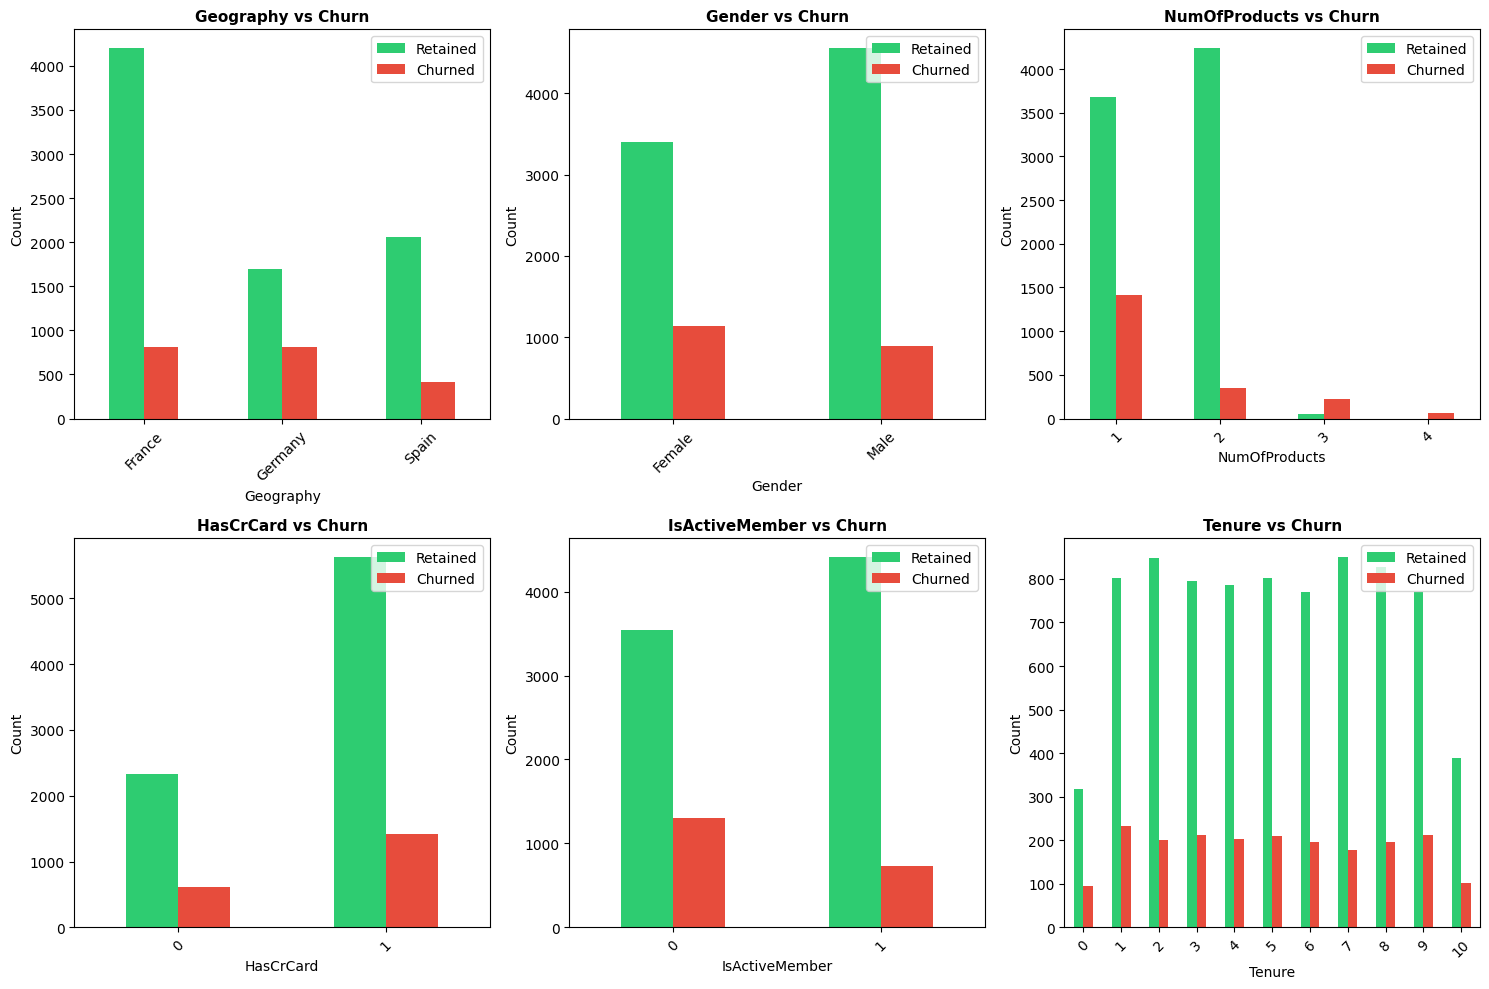


CHURN RATE BY CATEGORICAL FEATURES

Geography:
Geography
France     16.154767
Germany    32.443204
Spain      16.673395

Gender:
Gender
Female    25.071539
Male      16.455928

NumOfProducts:
NumOfProducts
1     27.714398
2      7.581699
3     82.706767
4    100.000000

HasCrCard:
HasCrCard
0    20.814941
1    20.184266

IsActiveMember:
IsActiveMember
0    26.850897
1    14.269074


In [6]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.extend(['HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Tenure'])

print("="*60)
print("CATEGORICAL FEATURES")
print("="*60)
print(categorical_cols)

# Visualize categorical features vs Churn
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

plot_features = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Tenure']

for idx, col in enumerate(plot_features):
    if col in df.columns:
        churn_data = df.groupby([col, 'Exited']).size().unstack(fill_value=0)
        churn_data.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'])
        axes[idx].set_title(f'{col} vs Churn', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel(col, fontsize=10)
        axes[idx].set_ylabel('Count', fontsize=10)
        axes[idx].legend(['Retained', 'Churned'], loc='upper right')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../reports/categorical_features_vs_churn.png', dpi=300,bbox_inches='tight')
print("\n Plot saved to: reports/categorical_features_vs_churn.png")
plt.show()

# Calculate churn rate by categorical features
print("\n" + "="*60)
print("CHURN RATE BY CATEGORICAL FEATURES")
print("="*60)
for col in ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']:
    if col in df.columns:
        churn_rate = df.groupby(col)['Exited'].mean() * 100
        print(f"\n{col}:")
        print(churn_rate.to_string())



CORRELATION MATRIX


CreditScore  Geography_encoded  Gender_encoded       Age  \
CreditScore           1.000000           0.007888       -0.002857 -0.003965   
Geography_encoded     0.007888           1.000000        0.004719  0.022812   
Gender_encoded       -0.002857           0.004719        1.000000 -0.027544   
Age                  -0.003965           0.022812       -0.027544  1.000000   
Tenure                0.000842           0.003739        0.014733 -0.009997   
Balance               0.006268           0.069408        0.012087  0.028308   
NumOfProducts         0.012238           0.003972       -0.021859 -0.030680   
HasCrCard            -0.005458          -0.008523        0.005766 -0.011721   
IsActiveMember        0.025651           0.006724        0.022544  0.085472   
EstimatedSalary      -0.001384          -0.001369       -0.008112 -0.007201   
Exited               -0.027094           0.035943       -0.106512  0.285323   

                     Tenure   Balance  NumOfProducts  HasCrCard  \
CreditScore        0.000842  0.006268       0.012238  -0.005458   
Geography_encoded  0.003739  0.069408       0.003972  -0.008523   
Gender_encoded     0.014733  0.012087      -0.021859   0.005766   
Age               -0.009997  0.028308      -0.030680  -0.011721   
Tenure             1.000000 -0.012254       0.013444   0.022583   
Balance           -0.012254  1.000000      -0.304180  -0.014858   
NumOfProducts      0.013444 -0.304180       1.000000   0.003183   
HasCrCard          0.022583 -0.014858       0.003183   1.000000   
IsActiveMember    -0.028362 -0.010084       0.009612  -0.011866   
EstimatedSalary    0.007784  0.012797       0.014204  -0.009933   
Exited            -0.014001  0.118533      -0.047820  -0.007138   

                   IsActiveMember  EstimatedSalary    Exited  
CreditScore              0.025651        -0.001384 -0.027094  
Geography_encoded        0.006724        -0.001369  0.035943  
Gender_encoded           0.022544        -0.008112 -0.106512  
Age                      0.085472        -0.007201  0.285323  
Tenure                  -0.028362         0.007784 -0.014001  
Balance                 -0.010084         0.012797  0.118533  
NumOfProducts            0.009612         0.014204 -0.047820  
HasCrCard               -0.011866        -0.009933 -0.007138  
IsActiveMember           1.000000        -0.011421 -0.156128  
EstimatedSalary         -0.011421         1.000000  0.012097  
Exited                  -0.156128         0.012097  1.000000


 Plot saved to: reports/correlation_matrix.png


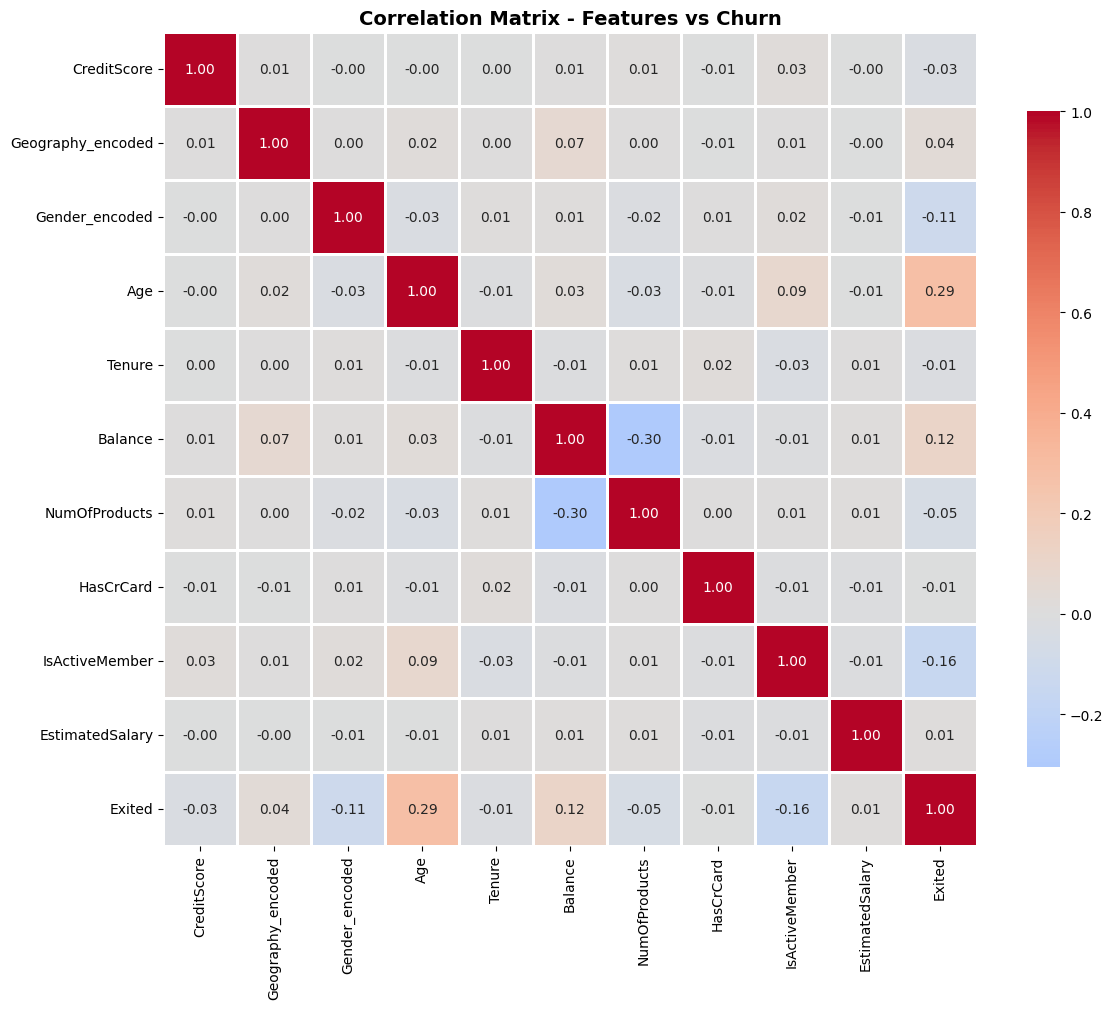


CORRELATION WITH TARGET VARIABLE (EXITED)
Exited               1.000000
Age                  0.285323
Balance              0.118533
Geography_encoded    0.035943
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Gender_encoded      -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64


In [7]:
# Create a copy for correlation analysis
df_corr = df.copy()

# Encode categorical variables for correlation
le_geo = LabelEncoder()
le_gender = LabelEncoder()

df_corr['Geography_encoded'] = le_geo.fit_transform(df_corr['Geography'])
df_corr['Gender_encoded'] = le_gender.fit_transform(df_corr['Gender'])

# Select relevant features for correlation
corr_features = ['CreditScore', 'Geography_encoded', 'Gender_encoded', 'Age', 
                 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                 'IsActiveMember', 'EstimatedSalary', 'Exited']

# Calculate correlation matrix
correlation_matrix = df_corr[corr_features].corr()

print("="*60)
print("CORRELATION MATRIX")
print("="*60)
display(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Features vs Churn', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../reports/correlation_matrix.png', dpi=300, bbox_inches='tight')
print("\n Plot saved to: reports/correlation_matrix.png")
plt.show()
print("\n" + "="*60)
print("CORRELATION WITH TARGET VARIABLE (EXITED)")
print("="*60)
target_corr = correlation_matrix['Exited'].sort_values(ascending=False)
print(target_corr)


In [8]:
# Select features for modeling
print("="*60)
print("FEATURE SELECTION")
print("="*60)
drop_columns = ['RowNumber', 'CustomerId', 'Surname']
df_model = df.drop(columns=drop_columns)

print(f"Dropped columns: {drop_columns}")
print(f"Remaining columns: {df_model.columns.tolist()}")

# Separate features and target
X = df_model.drop('Exited', axis=1)
y = df_model['Exited']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n" + "="*60)
print("TRAIN-TEST SPLIT")
print("="*60)
print(f"Training set size: {X_train.shape[0]} samples ({(len(X_train)/len(X))*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({(len(X_test)/len(X))*100:.1f}%)")
print(f"\nTraining set - Churned: {y_train.sum()}, Retained: {len(y_train) - y_train.sum()}")
print(f"Testing set - Churned: {y_test.sum()}, Retained: {len(y_test) - y_test.sum()}")

print("\n Data split completed successfully!")

FEATURE SELECTION
Dropped columns: ['RowNumber', 'CustomerId', 'Surname']
Remaining columns: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

Features shape: (10000, 10)
Target shape: (10000,)

TRAIN-TEST SPLIT
Training set size: 8000 samples (80.0%)
Testing set size: 2000 samples (20.0%)

Training set - Churned: 1630, Retained: 6370
Testing set - Churned: 407, Retained: 1593

 Data split completed successfully!


In [9]:
print("="*60)
print("ENCODING CATEGORICAL VARIABLES")
print("="*60)
# Initialize label encoders
le_geography = LabelEncoder()
le_gender = LabelEncoder()

# Encode Geography
X_train['Geography'] = le_geography.fit_transform(X_train['Geography'])
X_test['Geography'] = le_geography.transform(X_test['Geography'])

print("Geography encoding:")
for i, label in enumerate(le_geography.classes_):
    print(f"  {label} -> {i}")

# Encode Gender
X_train['Gender'] = le_gender.fit_transform(X_train['Gender'])
X_test['Gender'] = le_gender.transform(X_test['Gender'])

print("\nGender encoding:")
for i, label in enumerate(le_gender.classes_):
    print(f"  {label} -> {i}")

# Save encoders for future use
joblib.dump(le_geography, '../models/label_encoder_geography.pkl')
joblib.dump(le_gender, '../models/label_encoder_gender.pkl')

print("\n Encoders saved to models folder")
print("  - label_encoder_geography.pkl")
print("  - label_encoder_gender.pkl")

# Display first few rows after encoding
print("\n" + "="*60)
print("TRAINING DATA AFTER ENCODING (First 5 rows)")
print("="*60)
display(X_train.head())

ENCODING CATEGORICAL VARIABLES
Geography encoding:
  France -> 0
  Germany -> 1
  Spain -> 2

Gender encoding:
  Female -> 0
  Male -> 1

 Encoders saved to models folder
  - label_encoder_geography.pkl
  - label_encoder_gender.pkl

TRAINING DATA AFTER ENCODING (First 5 rows)


CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
2151          753          0       1   57       7       0.00              1   
8392          739          1       1   32       3  102128.27              1   
5006          755          1       0   37       0  113865.23              2   
4117          561          0       1   37       5       0.00              2   
7182          692          1       1   49       6  110540.43              2   

      HasCrCard  IsActiveMember  EstimatedSalary  
2151          1               0        159475.08  
8392          1               0         63981.37  
5006          1               1        117396.25  
4117          1               0         83093.25  
7182          0               1        107472.99

In [10]:
print("="*60)
print("FEATURE SCALING")
print("="*60)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform training data, transform testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Scaling completed using StandardScaler")
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Scaled testing data shape: {X_test_scaled.shape}")

# Save scaler for future use
joblib.dump(scaler, '../models/standard_scaler.pkl')
print("\n Scaler saved to: models/standard_scaler.pkl")

# Display statistics of scaled data
print("\n" + "="*60)
print("SCALED TRAINING DATA STATISTICS")
print("="*60)
display(X_train_scaled.describe())

print("\n" + "="*60)
print("COMPARISON: BEFORE AND AFTER SCALING (First feature)")
print("="*60)
sample_feature = X_train.columns[0]
print(f"\nBefore scaling ({sample_feature}):")
print(f"  Mean: {X_train[sample_feature].mean():.2f}")
print(f"  Std: {X_train[sample_feature].std():.2f}")
print(f"\nAfter scaling ({sample_feature}):")
print(f"  Mean: {X_train_scaled[sample_feature].mean():.2e}")
print(f"  Std: {X_train_scaled[sample_feature].std():.2f}")

FEATURE SCALING
Scaling completed using StandardScaler
Scaled training data shape: (8000, 10)
Scaled testing data shape: (2000, 10)

 Scaler saved to: models/standard_scaler.pkl

SCALED TRAINING DATA STATISTICS


CreditScore     Geography        Gender           Age        Tenure  \
count  8.000000e+03  8.000000e+03  8.000000e+03  8.000000e+03  8.000000e+03   
mean  -5.728751e-16 -5.406786e-17  7.105427e-17  2.486900e-16 -9.814372e-17   
std    1.000063e+00  1.000063e+00  1.000063e+00  1.000063e+00  1.000063e+00   
min   -3.113690e+00 -9.059328e-01 -1.101919e+00 -1.989948e+00 -1.731895e+00   
25%   -6.910884e-01 -9.059328e-01 -1.101919e+00 -6.599355e-01 -6.962018e-01   
50%    1.291536e-02  3.001685e-01  9.075074e-01 -1.849311e-01 -5.739468e-03   
75%    6.858601e-01  1.506270e+00  9.075074e-01  4.800751e-01  1.029954e+00   
max    2.062809e+00  1.506270e+00  9.075074e-01  5.040117e+00  1.720416e+00   

            Balance  NumOfProducts     HasCrCard  IsActiveMember  \
count  8.000000e+03   8.000000e+03  8.000000e+03    8.000000e+03   
mean   5.773160e-17  -9.503509e-17  4.440892e-18    4.263256e-17   
std    1.000063e+00   1.000063e+00  1.000063e+00    1.000063e+00   
min   -1.226059e+00  -9.102565e-01 -1.559960e+00   -1.030206e+00   
25%   -1.226059e+00  -9.102565e-01 -1.559960e+00   -1.030206e+00   
50%    3.318547e-01  -9.102565e-01  6.410419e-01    9.706797e-01   
75%    8.226886e-01   8.088304e-01  6.410419e-01    9.706797e-01   
max    2.600500e+00   4.247004e+00  6.410419e-01    9.706797e-01   

       EstimatedSalary  
count     8.000000e+03  
mean     -6.694645e-17  
std       1.000063e+00  
min      -1.739344e+00  
25%      -8.553582e-01  
50%      -4.951404e-03  
75%       8.511358e-01  
max       1.748805e+00


COMPARISON: BEFORE AND AFTER SCALING (First feature)

Before scaling (CreditScore):
  Mean: 650.75
  Std: 96.60

After scaling (CreditScore):
  Mean: -5.73e-16
  Std: 1.00


In [12]:
print("="*60)
print("MODEL 1: LOGISTIC REGRESSION")
print("="*60)

# Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
print("\nTraining Logistic Regression model...")
lr_model.fit(X_train_scaled, y_train)
print(" Training completed!")

# Make predictions
y_pred_lr_train = lr_model.predict(X_train_scaled)
y_pred_lr_test = lr_model.predict(X_test_scaled)

# Predict probabilities
y_pred_lr_train_proba = lr_model.predict_proba(X_train_scaled)[:, 1]
y_pred_lr_test_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# Calculate evaluation metrics
train_accuracy_lr = accuracy_score(y_train, y_pred_lr_train)
test_accuracy_lr = accuracy_score(y_test, y_pred_lr_test)
precision_lr = precision_score(y_test, y_pred_lr_test)
recall_lr = recall_score(y_test, y_pred_lr_test)
f1_lr = f1_score(y_test, y_pred_lr_test)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr_test_proba)

print("\n" + "="*60)
print("LOGISTIC REGRESSION - PERFORMANCE METRICS")
print("="*60)
print(f"Training Accuracy: {train_accuracy_lr:.4f} ({train_accuracy_lr*100:.2f}%)")
print(f"Testing Accuracy:  {test_accuracy_lr:.4f} ({test_accuracy_lr*100:.2f}%)")
print(f"Precision:         {precision_lr:.4f}")
print(f"Recall:            {recall_lr:.4f}")
print(f"F1-Score:          {f1_lr:.4f}")
print(f"ROC-AUC Score:     {roc_auc_lr:.4f}")

# Classification Report
print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred_lr_test, target_names=['Retained', 'Churned']))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr_test)
print("\n" + "="*60)
print("CONFUSION MATRIX")
print("="*60)
print(cm_lr)
joblib.dump(lr_model, '../models/logistic_regression_model.pkl')
print("\n Model saved to: models/logistic_regression_model.pkl")

MODEL 1: LOGISTIC REGRESSION

Training Logistic Regression model...
 Training completed!

LOGISTIC REGRESSION - PERFORMANCE METRICS
Training Accuracy: 0.8083 (80.83%)
Testing Accuracy:  0.8050 (80.50%)
Precision:         0.5859
Recall:            0.1425
F1-Score:          0.2292
ROC-AUC Score:     0.7710

CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Retained       0.82      0.97      0.89      1593
     Churned       0.59      0.14      0.23       407

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.81      0.75      2000


CONFUSION MATRIX
[[1552   41]
 [ 349   58]]

 Model saved to: models/logistic_regression_model.pkl


LOGISTIC REGRESSION - VISUALIZATIONS
 Visualization saved to: reports/logistic_regression_results.png


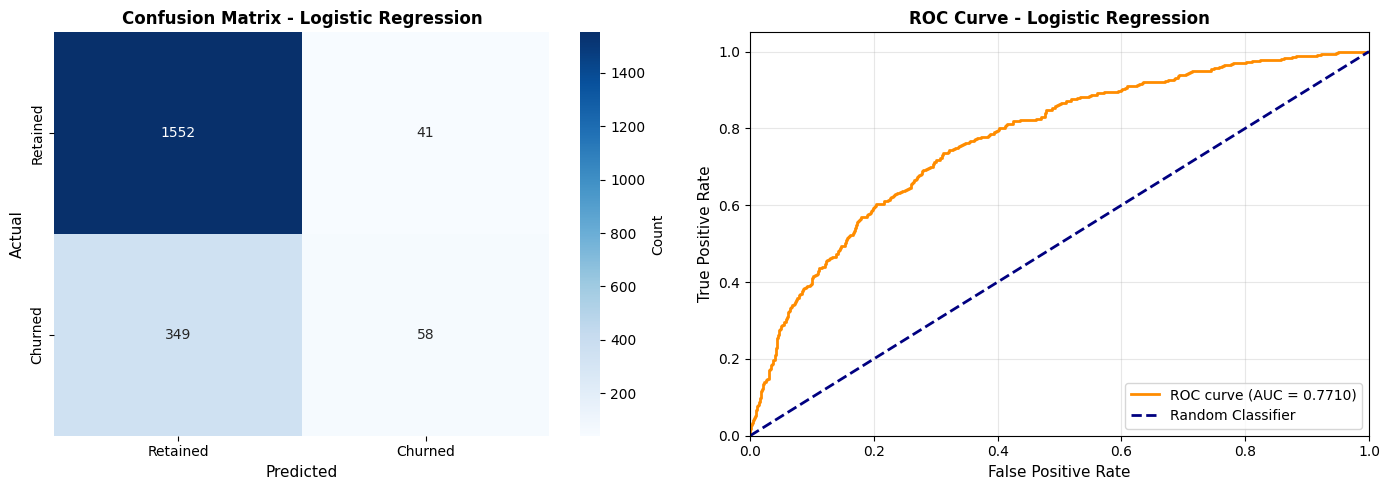


FEATURE IMPORTANCE (Coefficients)


Feature  Coefficient
3              Age     0.739402
8   IsActiveMember    -0.519640
5          Balance     0.314425
2           Gender    -0.267057
0      CreditScore    -0.086363
1        Geography     0.075674
9  EstimatedSalary     0.049505
6    NumOfProducts    -0.031104
7        HasCrCard    -0.025533
4           Tenure    -0.017044


 Feature importance plot saved to: reports/logistic_regression_feature_importance.png


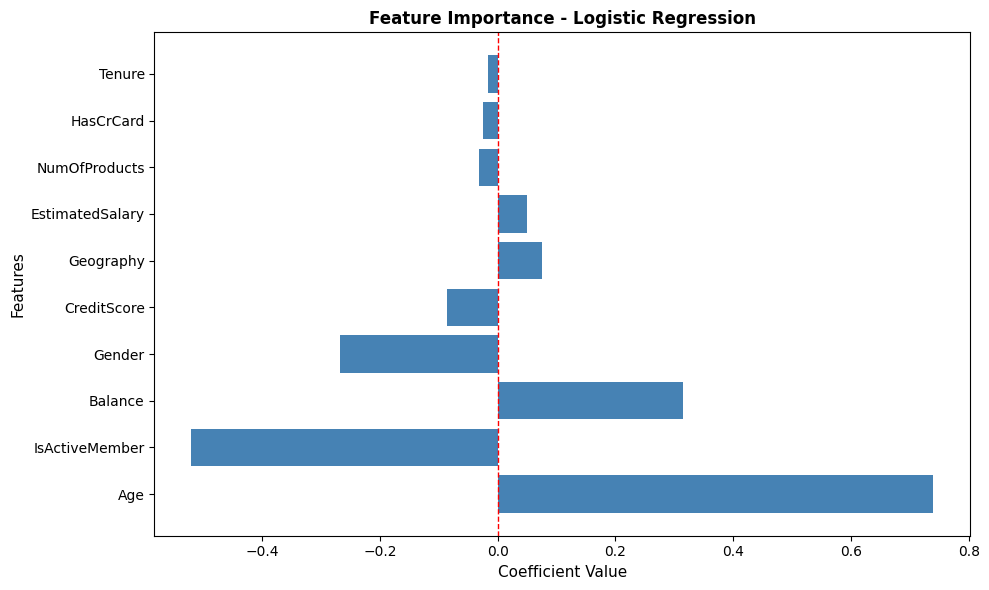

In [13]:
print("="*60)
print("LOGISTIC REGRESSION - VISUALIZATIONS")
print("="*60)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Confusion Matrix Heatmap
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=['Retained', 'Churned'], 
            yticklabels=['Retained', 'Churned'],
            cbar_kws={'label': 'Count'})
axes[0].set_title('Confusion Matrix - Logistic Regression', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=11)
axes[0].set_xlabel('Predicted', fontsize=11)

# 2. ROC Curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr_test_proba)
axes[1].plot(fpr_lr, tpr_lr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc_lr:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate', fontsize=11)
axes[1].set_ylabel('True Positive Rate', fontsize=11)
axes[1].set_title('ROC Curve - Logistic Regression', fontsize=12, fontweight='bold')
axes[1].legend(loc="lower right")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/logistic_regression_results.png', dpi=300, bbox_inches='tight')
print(" Visualization saved to: reports/logistic_regression_results.png")
plt.show()

# Feature Importance 
print("\n" + "="*60)
print("FEATURE IMPORTANCE (Coefficients)")
print("="*60)
feature_importance_lr = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

display(feature_importance_lr)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_lr['Feature'], feature_importance_lr['Coefficient'], color='steelblue')
plt.xlabel('Coefficient Value', fontsize=11)
plt.ylabel('Features', fontsize=11)
plt.title('Feature Importance - Logistic Regression', fontsize=12, fontweight='bold')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.tight_layout()
plt.savefig('../reports/logistic_regression_feature_importance.png', dpi=300, bbox_inches='tight')
print("\n Feature importance plot saved to: reports/logistic_regression_feature_importance.png")
plt.show()

In [14]:
print("="*60)
print("MODEL 2: RANDOM FOREST CLASSIFIER")
print("="*60)

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
print("\nTraining Random Forest model...")
rf_model.fit(X_train_scaled, y_train)
print(" Training completed!")

# Make predictions
y_pred_rf_train = rf_model.predict(X_train_scaled)
y_pred_rf_test = rf_model.predict(X_test_scaled)

# Predict probabilities
y_pred_rf_train_proba = rf_model.predict_proba(X_train_scaled)[:, 1]
y_pred_rf_test_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate evaluation metrics
train_accuracy_rf = accuracy_score(y_train, y_pred_rf_train)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf_test)
precision_rf = precision_score(y_test, y_pred_rf_test)
recall_rf = recall_score(y_test, y_pred_rf_test)
f1_rf = f1_score(y_test, y_pred_rf_test)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_test_proba)

print("\n" + "="*60)
print("RANDOM FOREST - PERFORMANCE METRICS")
print("="*60)
print(f"Training Accuracy: {train_accuracy_rf:.4f} ({train_accuracy_rf*100:.2f}%)")
print(f"Testing Accuracy:  {test_accuracy_rf:.4f} ({test_accuracy_rf*100:.2f}%)")
print(f"Precision:         {precision_rf:.4f}")
print(f"Recall:            {recall_rf:.4f}")
print(f"F1-Score:          {f1_rf:.4f}")
print(f"ROC-AUC Score:     {roc_auc_rf:.4f}")

# Classification Report
print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred_rf_test, target_names=['Retained', 'Churned']))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf_test)
print("\n" + "="*60)
print("CONFUSION MATRIX")
print("="*60)
print(cm_rf)
joblib.dump(rf_model, '../models/random_forest_model.pkl')
print("\n Model saved to: models/random_forest_model.pkl")

MODEL 2: RANDOM FOREST CLASSIFIER

Training Random Forest model...
 Training completed!

RANDOM FOREST - PERFORMANCE METRICS
Training Accuracy: 1.0000 (100.00%)
Testing Accuracy:  0.8645 (86.45%)
Precision:         0.7857
Recall:            0.4595
F1-Score:          0.5798
ROC-AUC Score:     0.8469

CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Retained       0.88      0.97      0.92      1593
     Churned       0.79      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000


CONFUSION MATRIX
[[1542   51]
 [ 220  187]]

 Model saved to: models/random_forest_model.pkl


RANDOM FOREST - VISUALIZATIONS
 Visualization saved to: reports/random_forest_results.png


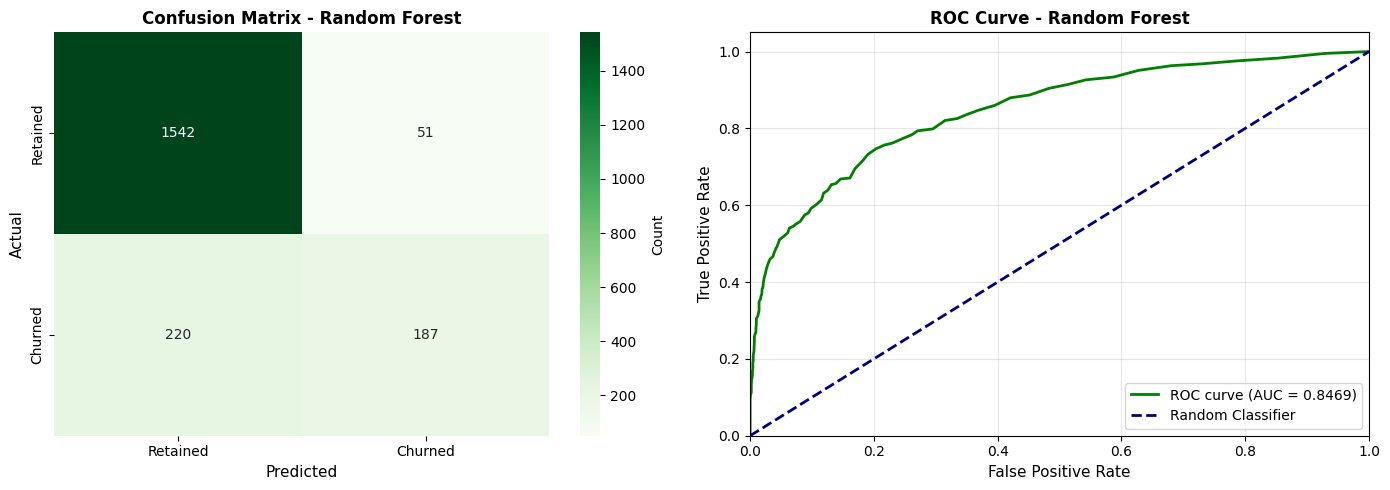


FEATURE IMPORTANCE


Feature  Importance
3              Age    0.239934
9  EstimatedSalary    0.147069
0      CreditScore    0.144104
5          Balance    0.141194
6    NumOfProducts    0.129134
4           Tenure    0.081958
8   IsActiveMember    0.039596
1        Geography    0.038467
7        HasCrCard    0.019583
2           Gender    0.018959


 Feature importance plot saved to: reports/random_forest_feature_importance.png


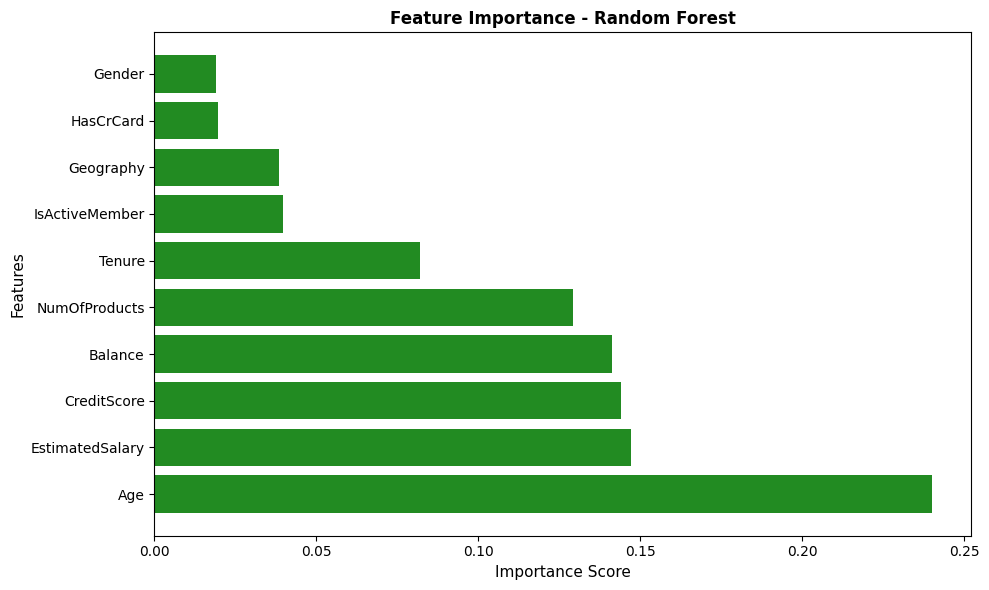

In [15]:
print("="*60)
print("RANDOM FOREST - VISUALIZATIONS")
print("="*60)

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Confusion Matrix Heatmap
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[0], 
            xticklabels=['Retained', 'Churned'], 
            yticklabels=['Retained', 'Churned'],
            cbar_kws={'label': 'Count'})
axes[0].set_title('Confusion Matrix - Random Forest', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=11)
axes[0].set_xlabel('Predicted', fontsize=11)

# 2. ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf_test_proba)
axes[1].plot(fpr_rf, tpr_rf, color='green', lw=2, 
             label=f'ROC curve (AUC = {roc_auc_rf:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate', fontsize=11)
axes[1].set_ylabel('True Positive Rate', fontsize=11)
axes[1].set_title('ROC Curve - Random Forest', fontsize=12, fontweight='bold')
axes[1].legend(loc="lower right")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/random_forest_results.png', dpi=300, bbox_inches='tight')
print(" Visualization saved to: reports/random_forest_results.png")
plt.show()

# Feature Importance
print("\n" + "="*60)
print("FEATURE IMPORTANCE")
print("="*60)
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

display(feature_importance_rf)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'], color='forestgreen')
plt.xlabel('Importance Score', fontsize=11)
plt.ylabel('Features', fontsize=11)
plt.title('Feature Importance - Random Forest', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('../reports/random_forest_feature_importance.png', dpi=300, bbox_inches='tight')
print("\n Feature importance plot saved to: reports/random_forest_feature_importance.png")
plt.show()

In [16]:
print("="*60)
print("MODEL 3: GRADIENT BOOSTING CLASSIFIER")
print("="*60)

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, 
                                      max_depth=3, random_state=42)

# Train the model
print("\nTraining Gradient Boosting model...")
gb_model.fit(X_train_scaled, y_train)
print(" Training completed!")

# Make predictions
y_pred_gb_train = gb_model.predict(X_train_scaled)
y_pred_gb_test = gb_model.predict(X_test_scaled)

# Predict probabilities
y_pred_gb_train_proba = gb_model.predict_proba(X_train_scaled)[:, 1]
y_pred_gb_test_proba = gb_model.predict_proba(X_test_scaled)[:, 1]

# Calculate evaluation metrics
train_accuracy_gb = accuracy_score(y_train, y_pred_gb_train)
test_accuracy_gb = accuracy_score(y_test, y_pred_gb_test)
precision_gb = precision_score(y_test, y_pred_gb_test)
recall_gb = recall_score(y_test, y_pred_gb_test)
f1_gb = f1_score(y_test, y_pred_gb_test)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb_test_proba)

print("\n" + "="*60)
print("GRADIENT BOOSTING - PERFORMANCE METRICS")
print("="*60)
print(f"Training Accuracy: {train_accuracy_gb:.4f} ({train_accuracy_gb*100:.2f}%)")
print(f"Testing Accuracy:  {test_accuracy_gb:.4f} ({test_accuracy_gb*100:.2f}%)")
print(f"Precision:         {precision_gb:.4f}")
print(f"Recall:            {recall_gb:.4f}")
print(f"F1-Score:          {f1_gb:.4f}")
print(f"ROC-AUC Score:     {roc_auc_gb:.4f}")

# Classification Report
print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred_gb_test, target_names=['Retained', 'Churned']))

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb_test)
print("\n" + "="*60)
print("CONFUSION MATRIX")
print("="*60)
print(cm_gb)
joblib.dump(gb_model, '../models/gradient_boosting_model.pkl')
print("\n Model saved to: models/gradient_boosting_model.pkl")

MODEL 3: GRADIENT BOOSTING CLASSIFIER

Training Gradient Boosting model...
 Training completed!

GRADIENT BOOSTING - PERFORMANCE METRICS
Training Accuracy: 0.8704 (87.04%)
Testing Accuracy:  0.8675 (86.75%)
Precision:         0.7886
Recall:            0.4767
F1-Score:          0.5942
ROC-AUC Score:     0.8673

CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Retained       0.88      0.97      0.92      1593
     Churned       0.79      0.48      0.59       407

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000


CONFUSION MATRIX
[[1541   52]
 [ 213  194]]

 Model saved to: models/gradient_boosting_model.pkl


GRADIENT BOOSTING - VISUALIZATIONS
 Visualization saved to: reports/gradient_boosting_results.png


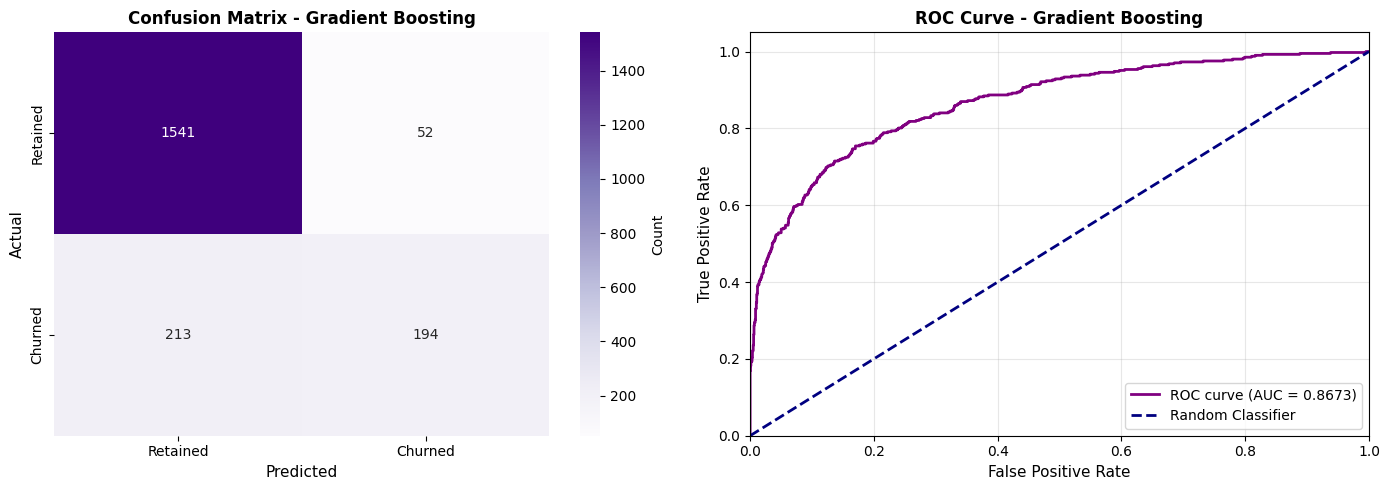


FEATURE IMPORTANCE


Feature  Importance
3              Age    0.395465
6    NumOfProducts    0.312571
8   IsActiveMember    0.117328
5          Balance    0.077374
1        Geography    0.040736
9  EstimatedSalary    0.018192
0      CreditScore    0.018150
2           Gender    0.014749
4           Tenure    0.004731
7        HasCrCard    0.000702


 Feature importance plot saved to: reports/gradient_boosting_feature_importance.png


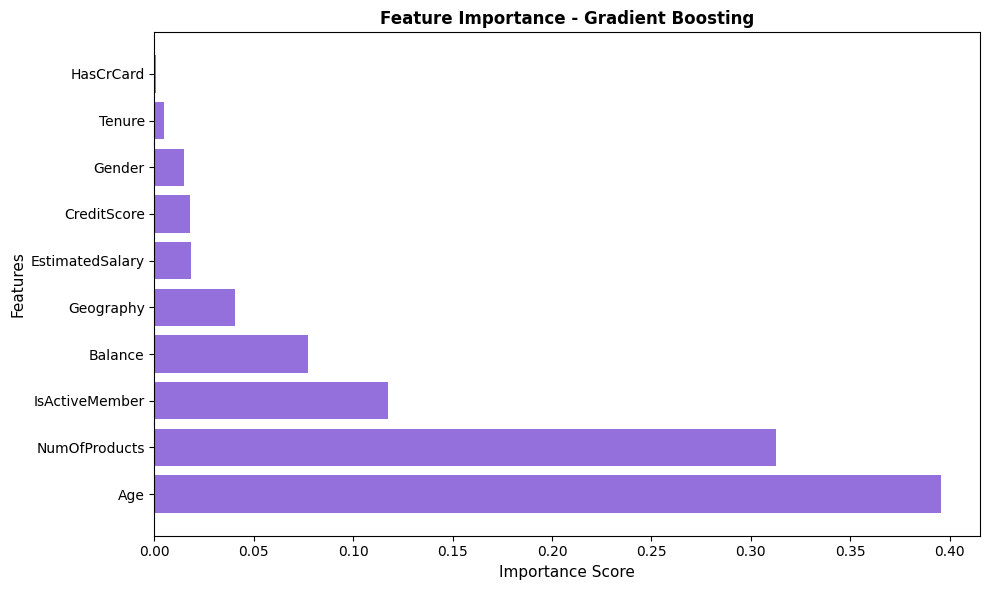

In [17]:
print("="*60)
print("GRADIENT BOOSTING - VISUALIZATIONS")
print("="*60)

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Confusion Matrix Heatmap
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Purples', ax=axes[0], 
            xticklabels=['Retained', 'Churned'], 
            yticklabels=['Retained', 'Churned'],
            cbar_kws={'label': 'Count'})
axes[0].set_title('Confusion Matrix - Gradient Boosting', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=11)
axes[0].set_xlabel('Predicted', fontsize=11)

# 2. ROC Curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_gb_test_proba)
axes[1].plot(fpr_gb, tpr_gb, color='purple', lw=2, 
             label=f'ROC curve (AUC = {roc_auc_gb:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate', fontsize=11)
axes[1].set_ylabel('True Positive Rate', fontsize=11)
axes[1].set_title('ROC Curve - Gradient Boosting', fontsize=12, fontweight='bold')
axes[1].legend(loc="lower right")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/gradient_boosting_results.png', dpi=300, bbox_inches='tight')
print(" Visualization saved to: reports/gradient_boosting_results.png")
plt.show()

# Feature Importance
print("\n" + "="*60)
print("FEATURE IMPORTANCE")
print("="*60)
feature_importance_gb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

display(feature_importance_gb)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_gb['Feature'], feature_importance_gb['Importance'], color='mediumpurple')
plt.xlabel('Importance Score', fontsize=11)
plt.ylabel('Features', fontsize=11)
plt.title('Feature Importance - Gradient Boosting', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('../reports/gradient_boosting_feature_importance.png', dpi=300, bbox_inches='tight')
print("\n Feature importance plot saved to: reports/gradient_boosting_feature_importance.png")
plt.show()

MODEL COMPARISON

Performance Metrics Comparison:


Model  Training Accuracy  Testing Accuracy  Precision  \
0  Logistic Regression           0.808250            0.8050   0.585859   
1        Random Forest           1.000000            0.8645   0.785714   
2    Gradient Boosting           0.870375            0.8675   0.788618   

     Recall  F1-Score   ROC-AUC  
0  0.142506  0.229249  0.771044  
1  0.459459  0.579845  0.846900  
2  0.476658  0.594181  0.867301


 Model comparison saved to: reports/model_comparison.csv

BEST MODEL
Model: Gradient Boosting
Testing Accuracy: 0.8675 (86.75%)

 Comparison visualization saved to: reports/model_comparison_visualization.png


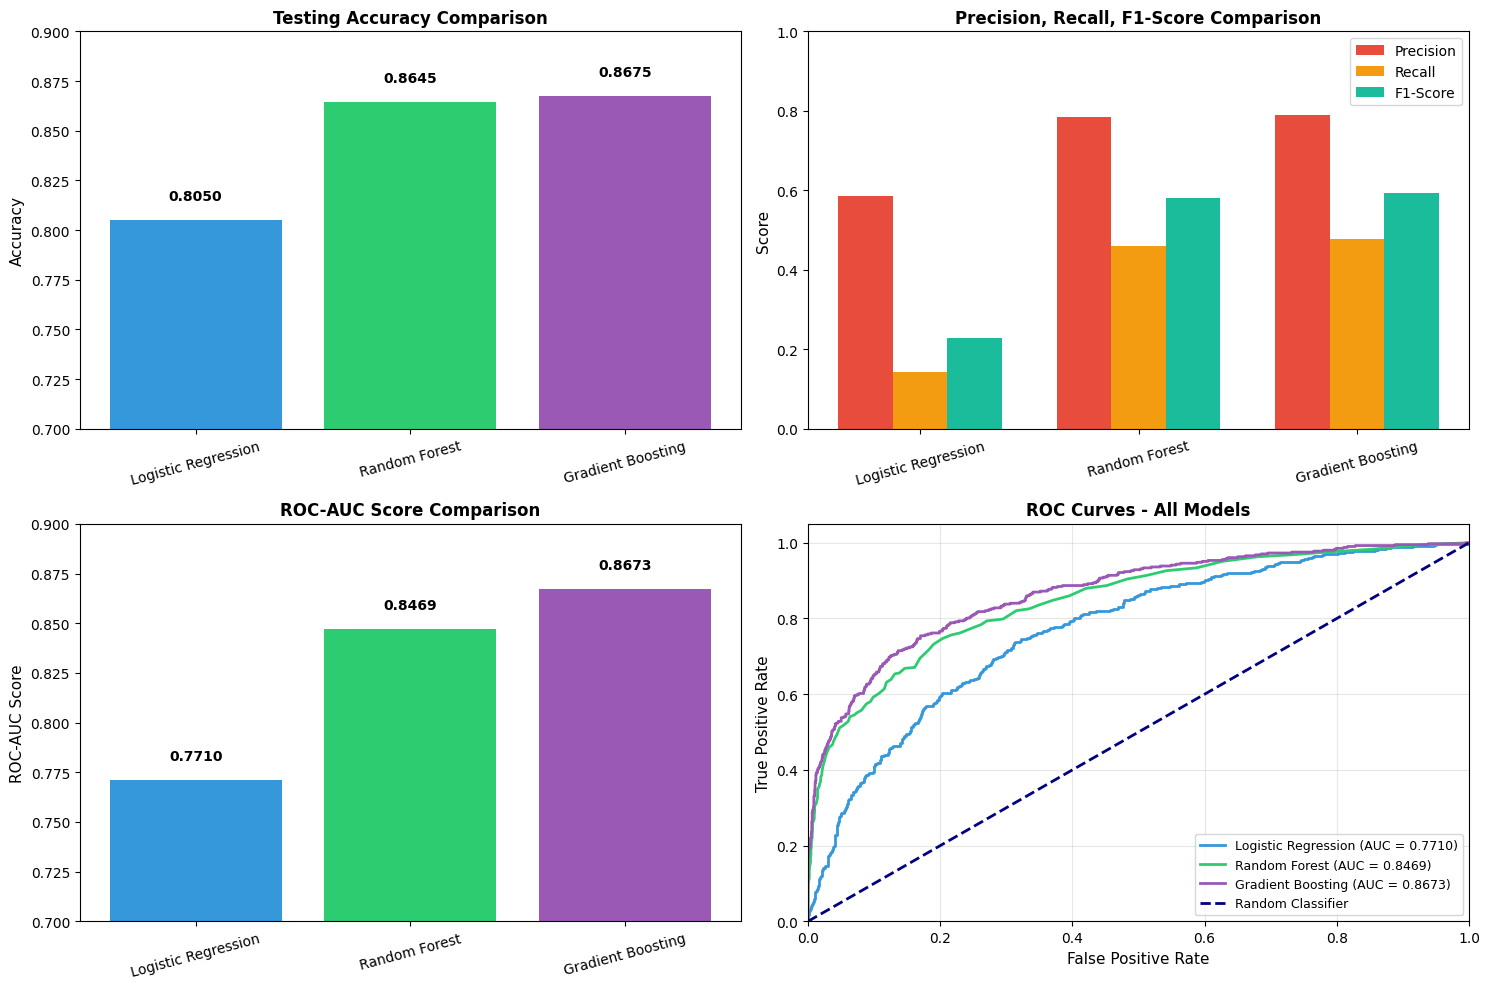

In [18]:
print("="*60)
print("MODEL COMPARISON")
print("="*60)

# Create comparison dataframe
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Training Accuracy': [train_accuracy_lr, train_accuracy_rf, train_accuracy_gb],
    'Testing Accuracy': [test_accuracy_lr, test_accuracy_rf, test_accuracy_gb],
    'Precision': [precision_lr, precision_rf, precision_gb],
    'Recall': [recall_lr, recall_rf, recall_gb],
    'F1-Score': [f1_lr, f1_rf, f1_gb],
    'ROC-AUC': [roc_auc_lr, roc_auc_rf, roc_auc_gb]
})

print("\nPerformance Metrics Comparison:")
display(model_comparison)

# Save comparison to CSV
model_comparison.to_csv('../reports/model_comparison.csv', index=False)
print("\n Model comparison saved to: reports/model_comparison.csv")

# Identify best model
best_model_idx = model_comparison['Testing Accuracy'].idxmax()
best_model_name = model_comparison.loc[best_model_idx, 'Model']
best_accuracy = model_comparison.loc[best_model_idx, 'Testing Accuracy']

print("\n" + "="*60)
print("BEST MODEL")
print("="*60)
print(f"Model: {best_model_name}")
print(f"Testing Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Testing Accuracy Comparison
axes[0, 0].bar(model_comparison['Model'], model_comparison['Testing Accuracy'], 
               color=['#3498db', '#2ecc71', '#9b59b6'])
axes[0, 0].set_title('Testing Accuracy Comparison', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Accuracy', fontsize=11)
axes[0, 0].set_ylim([0.7, 0.9])
axes[0, 0].tick_params(axis='x', rotation=15)
for i, v in enumerate(model_comparison['Testing Accuracy']):
    axes[0, 0].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')

# 2. Precision, Recall, F1-Score Comparison
x = np.arange(len(model_comparison['Model']))
width = 0.25
axes[0, 1].bar(x - width, model_comparison['Precision'], width, label='Precision', color='#e74c3c')
axes[0, 1].bar(x, model_comparison['Recall'], width, label='Recall', color='#f39c12')
axes[0, 1].bar(x + width, model_comparison['F1-Score'], width, label='F1-Score', color='#1abc9c')
axes[0, 1].set_title('Precision, Recall, F1-Score Comparison', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Score', fontsize=11)
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(model_comparison['Model'], rotation=15)
axes[0, 1].legend()
axes[0, 1].set_ylim([0, 1])

# 3. ROC-AUC Score Comparison
axes[1, 0].bar(model_comparison['Model'], model_comparison['ROC-AUC'], 
               color=['#3498db', '#2ecc71', '#9b59b6'])
axes[1, 0].set_title('ROC-AUC Score Comparison', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('ROC-AUC Score', fontsize=11)
axes[1, 0].set_ylim([0.7, 0.9])
axes[1, 0].tick_params(axis='x', rotation=15)
for i, v in enumerate(model_comparison['ROC-AUC']):
    axes[1, 0].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')

# 4. ROC Curves - All Models
axes[1, 1].plot(fpr_lr, tpr_lr, color='#3498db', lw=2, 
                label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')
axes[1, 1].plot(fpr_rf, tpr_rf, color='#2ecc71', lw=2, 
                label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
axes[1, 1].plot(fpr_gb, tpr_gb, color='#9b59b6', lw=2, 
                label=f'Gradient Boosting (AUC = {roc_auc_gb:.4f})')
axes[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
axes[1, 1].set_xlim([0.0, 1.0])
axes[1, 1].set_ylim([0.0, 1.05])
axes[1, 1].set_xlabel('False Positive Rate', fontsize=11)
axes[1, 1].set_ylabel('True Positive Rate', fontsize=11)
axes[1, 1].set_title('ROC Curves - All Models', fontsize=12, fontweight='bold')
axes[1, 1].legend(loc="lower right", fontsize=9)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/model_comparison_visualization.png', dpi=300, bbox_inches='tight')
print("\n Comparison visualization saved to: reports/model_comparison_visualization.png")
plt.show()

In [23]:
print("="*60)
print("SAVING PREDICTIONS")
print("="*60)

# Create predictions dataframe
predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'LR_Prediction': y_pred_lr_test,
    'LR_Probability': y_pred_lr_test_proba,
    'RF_Prediction': y_pred_rf_test,
    'RF_Probability': y_pred_rf_test_proba,
    'GB_Prediction': y_pred_gb_test,
    'GB_Probability': y_pred_gb_test_proba
}, index=y_test.index)
predictions_df.to_csv('../reports/model_predictions.csv', index=True)
print(" Predictions saved to: reports/model_predictions.csv")

print("\nFirst 10 predictions:")
display(predictions_df.head(10))

# Create a comprehensive summary report
print("\n" + "="*60)
print("GENERATING FINAL SUMMARY REPORT")
print("="*60)

churn_rate = (df['Exited'].sum() / len(df)) * 100
retention_rate = ((len(df) - df['Exited'].sum()) / len(df)) * 100

report_content = f"""
{'='*80}
CUSTOMER CHURN PREDICTION - PROJECT SUMMARY REPORT
{'='*80}

1. DATASET INFORMATION
{'='*80}
   - Total Records: {df.shape[0]}
   - Total Features: {df.shape[1]}
   - Target Variable: Exited (0 = Retained, 1 = Churned)
   - Churn Rate: {churn_rate:.2f}%
   - Retention Rate: {retention_rate:.2f}%

2. DATA PREPROCESSING
{'='*80}
   - Missing Values: None
   - Features Dropped: RowNumber, CustomerId, Surname
   - Categorical Encoding: Geography, Gender (Label Encoding)
   - Feature Scaling: StandardScaler applied
   - Train-Test Split: 80-20 (Stratified)
   - Training Samples: {len(X_train)}
   - Testing Samples: {len(X_test)}

3. MODELS TRAINED
{'='*80}
   Logistic Regression
   Random Forest Classifier (100 estimators)
   Gradient Boosting Classifier (100 estimators)

4. MODEL PERFORMANCE COMPARISON
{'='*80}

   Logistic Regression:
   --------------------
   - Training Accuracy:  {train_accuracy_lr:.4f} ({train_accuracy_lr*100:.2f}%)
   - Testing Accuracy:   {test_accuracy_lr:.4f} ({test_accuracy_lr*100:.2f}%)
   - Precision:          {precision_lr:.4f}
   - Recall:             {recall_lr:.4f}
   - F1-Score:           {f1_lr:.4f}
   - ROC-AUC:            {roc_auc_lr:.4f}

   Random Forest:
   --------------
   - Training Accuracy:  {train_accuracy_rf:.4f} ({train_accuracy_rf*100:.2f}%)
   - Testing Accuracy:   {test_accuracy_rf:.4f} ({test_accuracy_rf*100:.2f}%)
   - Precision:          {precision_rf:.4f}
   - Recall:             {recall_rf:.4f}
   - F1-Score:           {f1_rf:.4f}
   - ROC-AUC:            {roc_auc_rf:.4f}

   Gradient Boosting:
   ------------------
   - Training Accuracy:  {train_accuracy_gb:.4f} ({train_accuracy_gb*100:.2f}%)
   - Testing Accuracy:   {test_accuracy_gb:.4f} ({test_accuracy_gb*100:.2f}%)
   - Precision:          {precision_gb:.4f}
   - Recall:             {recall_gb:.4f}
   - F1-Score:           {f1_gb:.4f}
   - ROC-AUC:            {roc_auc_gb:.4f}

5. BEST MODEL
{'='*80}
   Model: {best_model_name}
   Testing Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)

6. KEY INSIGHTS
{'='*80}
   - All three models performed well with testing accuracy above 80%
   - {best_model_name} achieved the highest testing accuracy
   - Feature importance analysis shows that Age, NumOfProducts, and 
     IsActiveMember are among the most important predictors
   - The models can help identify customers at risk of churning

7. FILES GENERATED
{'='*80}
   Models (saved in models/):
   - logistic_regression_model.pkl
   - random_forest_model.pkl
   - gradient_boosting_model.pkl
   - standard_scaler.pkl
   - label_encoder_geography.pkl
   - label_encoder_gender.pkl

   Reports (saved in reports/):
   - target_distribution.png
   - numerical_features_distribution.png
   - categorical_features_vs_churn.png
   - correlation_matrix.png
   - logistic_regression_results.png
   - logistic_regression_feature_importance.png
   - random_forest_results.png
   - random_forest_feature_importance.png
   - gradient_boosting_results.png
   - gradient_boosting_feature_importance.png
   - model_comparison_visualization.png
   - model_comparison.csv
   - model_predictions.csv
   - project_summary_report.txt

8. CONCLUSION
{'='*80}
   The customer churn prediction models have been successfully developed
   and evaluated. The {best_model_name} model is recommended for
   deployment based on its superior performance metrics.

{'='*80}
Report Generated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
{'='*80}
"""
with open('../reports/project_summary_report.txt', 'w') as f:
    f.write(report_content)

print(report_content)
print("\n Summary report saved to: reports/project_summary_report.txt")

SAVING PREDICTIONS
 Predictions saved to: reports/model_predictions.csv

First 10 predictions:


Actual  LR_Prediction  LR_Probability  RF_Prediction  RF_Probability  \
5702       0              0        0.120459              0            0.03   
3667       0              0        0.205442              0            0.03   
1617       0              0        0.127954              0            0.12   
5673       0              0        0.218417              0            0.01   
4272       0              0        0.122993              0            0.08   
8270       0              0        0.147854              0            0.32   
7079       0              0        0.060052              0            0.01   
5295       0              0        0.289463              0            0.22   
845        0              0        0.388260              1            0.59   
5311       0              0        0.218940              0            0.14   

      GB_Prediction  GB_Probability  
5702              0        0.020803  
3667              0        0.080359  
1617              0        0.034406  
5673              0        0.053668  
4272              0        0.100683  
8270              0        0.197905  
7079              0        0.055495  
5295              0        0.256809  
845               1        0.522039  
5311              0        0.058530


GENERATING FINAL SUMMARY REPORT

CUSTOMER CHURN PREDICTION - PROJECT SUMMARY REPORT

1. DATASET INFORMATION
   - Total Records: 10000
   - Total Features: 14
   - Target Variable: Exited (0 = Retained, 1 = Churned)
   - Churn Rate: 20.37%
   - Retention Rate: 79.63%

2. DATA PREPROCESSING
   - Missing Values: None
   - Features Dropped: RowNumber, CustomerId, Surname
   - Categorical Encoding: Geography, Gender (Label Encoding)
   - Feature Scaling: StandardScaler applied
   - Train-Test Split: 80-20 (Stratified)
   - Training Samples: 8000
   - Testing Samples: 2000

3. MODELS TRAINED
   Logistic Regression
   Random Forest Classifier (100 estimators)
   Gradient Boosting Classifier (100 estimators)

4. MODEL PERFORMANCE COMPARISON

   Logistic Regression:
   --------------------
   - Training Accuracy:  0.8083 (80.83%)
   - Testing Accuracy:   0.8050 (80.50%)
   - Precision:          0.5859
   - Recall:             0.1425
   - F1-Score:           0.2292
   - ROC-AUC:            0.77

In [26]:
print("="*80)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("="*80)

print("\n" + "="*80)
print("TASK 3: CUSTOMER CHURN PREDICTION - COMPLETION SUMMARY")
print("="*80)

print("\n COMPLETED STEPS:")
print("-" * 80)
steps_completed = [
    "1.  Imported all required libraries",
    "2.  Loaded the Churn_Modelling.csv dataset",
    "3.  Performed Exploratory Data Analysis (EDA)",
    "4.  Analyzed numerical and categorical features",
    "5.  Created correlation analysis",
    "6.  Preprocessed data (feature selection, train-test split)",
    "7.  Encoded categorical variables",
    "8.  Applied feature scaling (StandardScaler)",
    "9.  Built Logistic Regression model",
    "10. Visualized Logistic Regression results",
    "11. Built Random Forest Classifier",
    "12. Visualized Random Forest results",
    "13. Built Gradient Boosting Classifier",
    "14. Visualized Gradient Boosting results",
    "15. Compared all models",
    "16. Saved predictions and created final report"
]

for step in steps_completed:
    print(f"   {step}")

print("\n" + "="*80)
print(" MODELS TRAINED (3 ALGORITHMS)")
print("="*80)
models_info = [
    ("Logistic Regression", test_accuracy_lr, roc_auc_lr),
    ("Random Forest", test_accuracy_rf, roc_auc_rf),
    ("Gradient Boosting", test_accuracy_gb, roc_auc_gb)
]

for model_name, acc, auc in models_info:
    print(f" {model_name:25} | Accuracy: {acc:.4f} | ROC-AUC: {auc:.4f}")

print("\n" + "="*80)
print(" BEST PERFORMING MODEL")
print("="*80)
print(f" Model: {best_model_name}")
print(f" Testing Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

print("\n" + "="*80)
print(" FILES GENERATED")
print("="*80)

print("\n Models Folder (6 files):")
model_files = [
    "logistic_regression_model.pkl",
    "random_forest_model.pkl", 
    "gradient_boosting_model.pkl",
    "standard_scaler.pkl",
    "label_encoder_geography.pkl",
    "label_encoder_gender.pkl"
]
for file in model_files:
    print(f"• {file}")

print("\n   Reports Folder (13 files):")
report_files = [
    "target_distribution.png",
    "numerical_features_distribution.png",
    "categorical_features_vs_churn.png",
    "correlation_matrix.png",
    "logistic_regression_results.png",
    "logistic_regression_feature_importance.png",
    "random_forest_results.png",
    "random_forest_feature_importance.png",
    "gradient_boosting_results.png",
    "gradient_boosting_feature_importance.png",
    "model_comparison_visualization.png",
    "model_comparison.csv",
    "model_predictions.csv",
    "project_summary_report.txt"
]
for file in report_files:
    print(f"• {file}")

print("\n" + "="*80)
print("NOTEBOOK LOCATION")
print("="*80)
print(" notebooks/customer_churn_prediction.ipynb")

print("\n" + "="*80)
print("TASK OBJECTIVES ACHIEVED")
print("="*80)
objectives = [
    "Developed models to predict customer churn",
    "Used historical customer data with usage behavior and demographics",
    "Implemented Logistic Regression algorithm",
    "Implemented Random Forest algorithm",
    "Implemented Gradient Boosting algorithm",
    "Evaluated and compared all models",
    "Generated comprehensive visualizations and reports",
    "Saved all models and outputs to appropriate folders"
]

for objective in objectives:
    print(f"   {objective}")

print("\n" + "="*80)
print("NEXT STEPS (Optional)")
print("="*80)
next_steps = [
    "1. Hyperparameter tuning for better model performance",
    "2. Try other algorithms (XGBoost, LightGBM, Neural Networks)",
    "3. Feature engineering to create new meaningful features",
    "4. Handle class imbalance using SMOTE or other techniques",
    "5. Deploy the best model for real-time predictions",
    "6. Create a web interface for the model"
]

for step in next_steps:
    print(f" {step}")

print("\n" + "="*80)
print(" CONGRATULATIONS! Your Task 3 is Complete!")

PROJECT COMPLETED SUCCESSFULLY!

TASK 3: CUSTOMER CHURN PREDICTION - COMPLETION SUMMARY

 COMPLETED STEPS:
--------------------------------------------------------------------------------
   1.  Imported all required libraries
   2.  Loaded the Churn_Modelling.csv dataset
   3.  Performed Exploratory Data Analysis (EDA)
   4.  Analyzed numerical and categorical features
   5.  Created correlation analysis
   6.  Preprocessed data (feature selection, train-test split)
   7.  Encoded categorical variables
   8.  Applied feature scaling (StandardScaler)
   9.  Built Logistic Regression model
   10. Visualized Logistic Regression results
   11. Built Random Forest Classifier
   12. Visualized Random Forest results
   13. Built Gradient Boosting Classifier
   14. Visualized Gradient Boosting results
   15. Compared all models
   16. Saved predictions and created final report

 MODELS TRAINED (3 ALGORITHMS)
 Logistic Regression       | Accuracy: 0.8050 | ROC-AUC: 0.7710
 Random Forest       